# Ensemble of Classical Models

From the previous notebook, we saw that both Naive Bayes Classifier and Random Forest Classifier performed really well. So, in this notebook we construct an ensemble of these and then note how the perfrmance varies

In [22]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import roc_auc_score, multilabel_confusion_matrix, accuracy_score, classification_report, balanced_accuracy_score

In [23]:
df = pd.read_csv('data/cleaned_train.csv')
df.columns

Index(['id', 'marital_status', 'appln_mode', 'appln_order', 'prog_of_study',
       'morn/eve_attend', 'prev_edu', 'prev_edu_grade', 'nationality',
       'mom_edu', 'dad_edu', 'mom_occup', 'admission_grade', 'was_displaced',
       'edu_spl_need', 'has_student_debt', 'no_fee_dues', 'gender',
       'got_scholarship', 'age_at_start', 'sem1_units_credited',
       'sem1_units_enrolled', 'sem1_units_eval', 'sem1_units_approved',
       'sem1_units_grade', 'sem1_units_no_eval', 'sem2_units_credited',
       'sem2_units_enrolled', 'sem2_units_eval', 'sem2_units_approved',
       'sem2_units_grade', 'sem2_units_no_eval', 'unemployment_rate',
       'inflation', 'gdp', 'Target', 'marital_status_log', 'appln_order_log',
       'prog_of_study_log', 'morn/eve_attend_log', 'prev_edu_log',
       'mom_occup_log', 'edu_spl_need_log', 'has_student_debt_log',
       'no_fee_dues_log', 'got_scholarship_log', 'age_at_start_log',
       'sem1_units_credited_log', 'sem1_units_grade_log',
       'sem1_un

In [24]:
X,y = df.drop(columns=['Target','id','nationality']).values, df['Target'].values

# Train test split
le = LabelEncoder()
y_l = le.fit(y)
y_enc = y_l.transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_enc, test_size=0.2, random_state=42)

First, let's train the Random Forest classifier with `300` estimators

In [25]:
%%time
model_rf = RandomForestClassifier(n_estimators=300)
start = time.perf_counter()
model_rf.fit(X_train,y_train)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

Training ended in 37.911606800043955 s
CPU times: total: 30.8 s
Wall time: 37.9 s


In [26]:
y_pred = model_rf.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9466    0.8221    0.8800      4699
           1     0.6475    0.6315    0.6394      2961
           2     0.8478    0.9276    0.8859      7344

    accuracy                         0.8361     15004
   macro avg     0.8140    0.7937    0.8018     15004
weighted avg     0.8392    0.8361    0.8354     15004



The performance seems better than before, now let us train the LightGBM classifier

In [27]:
%%time
model_lg = LGBMClassifier()
start = time.perf_counter()
model_lg.fit(X_train,y_train)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003106 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 60014, number of used features: 50
[LightGBM] [Info] Start training from score -1.151719
[LightGBM] [Info] Start training from score -1.627750
[LightGBM] [Info] Start training from score -0.718391
Training ended in 0.7521330001764 s
CPU times: total: 5.52 s
Wall time: 831 ms


In [28]:
y_pred = model_lg.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9425    0.8302    0.8828      4699
           1     0.6525    0.6380    0.6452      2961
           2     0.8517    0.9243    0.8865      7344

    accuracy                         0.8383     15004
   macro avg     0.8156    0.7975    0.8048     15004
weighted avg     0.8408    0.8383    0.8377     15004



Vary `n_estimators`

In [29]:
estims = [5,10,20,50,100,200,300]
model = LGBMClassifier()
acc,tim = [], []
for x in estims:
    model = LGBMClassifier(n_estimators=x)
    start = time.perf_counter()
    model.fit(X_train,y_train)
    end = time.perf_counter()
    y_pred = model.predict(X_val)
    _acc = accuracy_score(y_val,y_pred)
    tim.append(end-start)
    print(f'n_estimators: {x}, time_taken: {end-start}s, accuracy: {_acc}')
    acc.append(_acc)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 60014, number of used features: 50
[LightGBM] [Info] Start training from score -1.151719
[LightGBM] [Info] Start training from score -1.627750
[LightGBM] [Info] Start training from score -0.718391
n_estimators: 5, time_taken: 0.14727330021560192s, accuracy: 0.8127832577979206
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 60014, number of used features: 50
[LightGBM] [Info] Start training from score -1.15171

Text(0.5, 1.0, 'Training time')

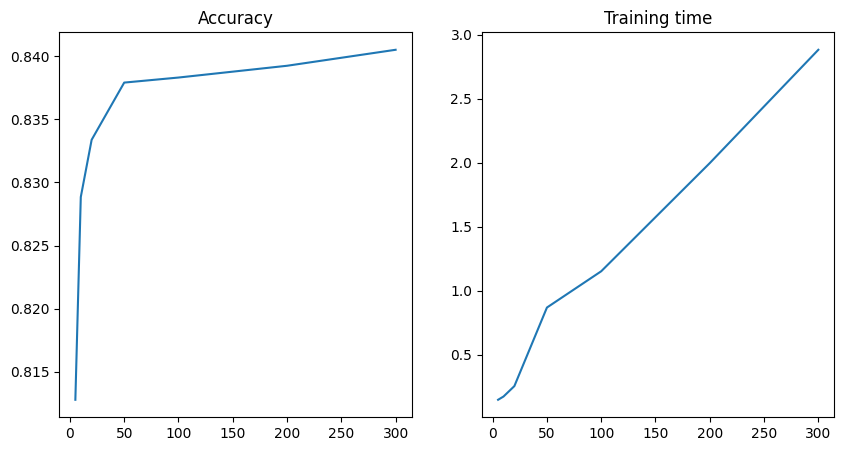

In [30]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(estims,acc)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(122)
ax2.plot(estims,tim)
ax2.set_title('Training time')

Try different boosting technique

In [31]:
params = {
    'boosting_type': 'rf',
    'bagging_freq': 1,
    'bagging_fraction': 0.8
}
model = LGBMClassifier()
acc,tim = [], []
for x in estims:
    model = LGBMClassifier(n_estimators=x,**params)
    start = time.perf_counter()
    model.fit(X_train,y_train)
    end = time.perf_counter()
    y_pred = model.predict(X_val)
    _acc = accuracy_score(y_val,y_pred)
    tim.append(end-start)
    print(f'n_estimators: {x}, time_taken: {end-start}s, accuracy: {_acc}')
    acc.append(_acc)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 60014, number of used features: 50
[LightGBM] [Info] Start training from score -1.151719
[LightGBM] [Info] Start training from score -1.627750
[LightGBM] [Info] Start training from score -0.718391
[LightGBM] [Warning] bagging_fracti

Text(0.5, 1.0, 'Training time')

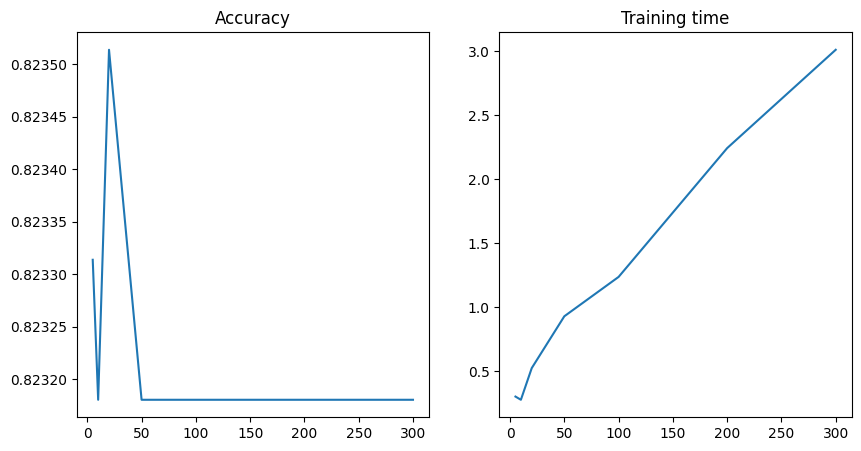

In [32]:
fig = plt.figure(figsize=(10,5))

ax1 = fig.add_subplot(121)
ax1.plot(estims,acc)
ax1.set_title('Accuracy')

ax2 = fig.add_subplot(122)
ax2.plot(estims,tim)
ax2.set_title('Training time')

Different boosting did not work

In [33]:
%%time
model_lgbm = LGBMClassifier(n_estimators=300)
start = time.perf_counter()
model_lgbm.fit(X_train,y_train)
end = time.perf_counter()
y_pred = model_lgbm.predict(X_val)
print(f'Training time: {end-start}s, Accuracy: {round(accuracy_score(y_val,y_pred)*100,3)}%')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 60014, number of used features: 50
[LightGBM] [Info] Start training from score -1.151719
[LightGBM] [Info] Start training from score -1.627750
[LightGBM] [Info] Start training from score -0.718391
Training time: 2.6183541999198496s, Accuracy: 84.051%
CPU times: total: 20.1 s
Wall time: 2.75 s


In [34]:
y_pred = model_lgbm.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9382    0.8368    0.8846      4699
           1     0.6593    0.6410    0.6500      2961
           2     0.8547    0.9233    0.8877      7344

    accuracy                         0.8405     15004
   macro avg     0.8174    0.8004    0.8074     15004
weighted avg     0.8423    0.8405    0.8398     15004



## The ensemble

The performance is similar to last time. Now let us combine these two models with weights `2` for Random Forest and `1` for Naive Bayes Classifier

In [35]:
%%time
soft_ensemble = VotingClassifier(estimators=[('rf',model_rf),('nb',model_lgbm)],voting='soft',weights=[1,1.2],verbose=True)
start = time.perf_counter()
soft_ensemble.fit(X_train,y_train)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total=  51.9s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 60014, number of used features: 50
[LightGBM] [Info] Start training from score -1.151719
[LightGBM] [Info] Start training from score -1.627750
[LightGBM] [Info] Start training from score -0.718391
[Voting] ....................... (2 of 2) Processing nb, total=   3.3s
Total training time: 55.24850980006158 s
CPU times: total: 42 s
Wall time: 56 s


In [36]:
y_pred = soft_ensemble.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9441    0.8306    0.8837      4699
           1     0.6569    0.6420    0.6494      2961
           2     0.8521    0.9254    0.8872      7344

    accuracy                         0.8398     15004
   macro avg     0.8177    0.7993    0.8068     15004
weighted avg     0.8424    0.8398    0.8392     15004



In [37]:
%%time
hard_ensemble = VotingClassifier(estimators=[('rf',model_rf),('nb',model_lgbm)],voting='hard',verbose=True)
start = time.perf_counter()
hard_ensemble.fit(X_train,y_train)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total= 1.2min
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033830 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 60014, number of used features: 50
[LightGBM] [Info] Start training from score -1.151719
[LightGBM] [Info] Start training from score -1.627750
[LightGBM] [Info] Start training from score -0.718391
[Voting] ....................... (2 of 2) Processing nb, total=  14.6s
Total training time: 86.2729110000655 s
CPU times: total: 1min 9s
Wall time: 1min 27s


In [38]:
y_pred = hard_ensemble.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9229    0.8453    0.8824      4699
           1     0.6441    0.6498    0.6469      2961
           2     0.8641    0.9075    0.8853      7344

    accuracy                         0.8372     15004
   macro avg     0.8104    0.8009    0.8049     15004
weighted avg     0.8391    0.8372    0.8373     15004



Let's try with weights

In [39]:
%%time
hard_ensemble_weighted = VotingClassifier(estimators=[('rf',model_rf),('nb',model_lgbm)],voting='hard',weights=[1,1.2],verbose=True)
start = time.perf_counter()
hard_ensemble_weighted.fit(X_train,y_train)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total= 1.3min
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1928
[LightGBM] [Info] Number of data points in the train set: 60014, number of used features: 50
[LightGBM] [Info] Start training from score -1.151719
[LightGBM] [Info] Start training from score -1.627750
[LightGBM] [Info] Start training from score -0.718391
[Voting] ....................... (2 of 2) Processing nb, total=   8.0s
Total training time: 86.16336710005999 s
CPU times: total: 1min 50s
Wall time: 1min 26s


In [40]:
y_pred = hard_ensemble_weighted.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9382    0.8368    0.8846      4699
           1     0.6593    0.6410    0.6500      2961
           2     0.8547    0.9233    0.8877      7344

    accuracy                         0.8405     15004
   macro avg     0.8174    0.8004    0.8074     15004
weighted avg     0.8423    0.8405    0.8398     15004



Next, let us try the hard ensemble but with oversampling

In [41]:
from imblearn.over_sampling import SMOTE

In [42]:
X_train1, y_train1 = SMOTE().fit_resample(X_train,y_train)

In [44]:
%%time
hard_ensemble = VotingClassifier(estimators=[('rf',model_rf),('nb',model_lgbm)],voting='hard',weights=[2,1],verbose=True)
start = time.perf_counter()
hard_ensemble.fit(X_train1,y_train1)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total= 3.3min
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11710
[LightGBM] [Info] Number of data points in the train set: 87777, number of used features: 50
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[Voting] ....................... (2 of 2) Processing nb, total=  12.9s
Total training time: 208.1757837999612 s
CPU times: total: 2min 57s
Wall time: 3min 28s


In [45]:
y_pred = hard_ensemble.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9530    0.8193    0.8811      4699
           1     0.6323    0.6724    0.6517      2961
           2     0.8583    0.9134    0.8850      7344

    accuracy                         0.8364     15004
   macro avg     0.8145    0.8017    0.8059     15004
weighted avg     0.8434    0.8364    0.8378     15004



## Train base by oversampling

We train base models by oversampling and then try the ensemble

In [46]:
%%time
rf_os = RandomForestClassifier(n_estimators=300)
start = time.perf_counter()
rf_os.fit(X_train1,y_train1)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

Training ended in 132.21215519984253 s
CPU times: total: 2min
Wall time: 2min 12s


In [47]:
y_pred = rf_os.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9532    0.8151    0.8787      4699
           1     0.6312    0.6717    0.6509      2961
           2     0.8565    0.9138    0.8842      7344

    accuracy                         0.8351     15004
   macro avg     0.8137    0.8002    0.8046     15004
weighted avg     0.8424    0.8351    0.8365     15004



In [48]:
%%time
lgbm_os = LGBMClassifier()
start = time.perf_counter()
lgbm_os.fit(X_train1,y_train1)
end = time.perf_counter()
print(f'Training ended in {end-start} s')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.014718 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11710
[LightGBM] [Info] Number of data points in the train set: 87777, number of used features: 50
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
Training ended in 4.892612399999052 s
CPU times: total: 25 s
Wall time: 4.89 s


In [49]:
y_pred = lgbm_os.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9421    0.8317    0.8835      4699
           1     0.6456    0.6528    0.6492      2961
           2     0.8569    0.9173    0.8861      7344

    accuracy                         0.8383     15004
   macro avg     0.8149    0.8006    0.8063     15004
weighted avg     0.8419    0.8383    0.8385     15004



Let's try the ensemble

In [50]:
%%time
hard_ensemble_os = VotingClassifier(estimators=[('rf',rf_os),('nb',lgbm_os)],voting='hard',weights=[1,1.2],verbose=True)
start = time.perf_counter()
hard_ensemble_os.fit(X_train1,y_train1)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total= 2.9min
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11710
[LightGBM] [Info] Number of data points in the train set: 87777, number of used features: 50
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[Voting] ....................... (2 of 2) Processing nb, total=   2.1s
Total training time: 175.99004839989357 s
CPU times: total: 2min 43s
Wall time: 2min 55s


In [51]:
y_pred = hard_ensemble_os.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9421    0.8317    0.8835      4699
           1     0.6456    0.6528    0.6492      2961
           2     0.8569    0.9173    0.8861      7344

    accuracy                         0.8383     15004
   macro avg     0.8149    0.8006    0.8063     15004
weighted avg     0.8419    0.8383    0.8385     15004



In [54]:
%%time
hard_ensemble_os1 = VotingClassifier(estimators=[('rf',model_rf),('nb',lgbm_os)],voting='hard',weights=[1,1.2],verbose=True)
start = time.perf_counter()
hard_ensemble_os1.fit(X_train1,y_train1)
end = time.perf_counter()
print(f'Total training time: {end-start} s')

[Voting] ....................... (1 of 2) Processing rf, total= 1.9min
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013934 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11710
[LightGBM] [Info] Number of data points in the train set: 87777, number of used features: 50
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[Voting] ....................... (2 of 2) Processing nb, total=   2.5s
Total training time: 116.77868089987896 s
CPU times: total: 2min 3s
Wall time: 1min 56s


In [55]:
y_pred = hard_ensemble_os1.predict(X_val)
print(classification_report(y_val, y_pred, labels = sorted(list(set(y_enc))), digits=4))

              precision    recall  f1-score   support

           0     0.9421    0.8317    0.8835      4699
           1     0.6456    0.6528    0.6492      2961
           2     0.8569    0.9173    0.8861      7344

    accuracy                         0.8383     15004
   macro avg     0.8149    0.8006    0.8063     15004
weighted avg     0.8419    0.8383    0.8385     15004



Oversampling did not help, in fact, it reduced performance